# Практическая работа №3: Регрессионный анализ
Выполнил студентка гр.1375 Петрова Варвара. Вариант 21

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения
1. Линейная регрессионная модель

$\mathbb{E}_{\theta}(Y|z)=x(z)^{T}\beta$

2. Метод Наименьших Квадратов (МНК)

$RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\|=(Y-X^{\intercal}\beta)^{\intercal}\cdot(Y-X^{\intercal}\beta)\to min_{\beta}$

3. Несмещённая оценка дисперсии $(S^{2})$

$S^{2} = \frac{SS_{e}}{n-r} = \frac{RSS(\widehat{\beta})}{n-r}$

$SS_{e}=RSS(\widehat{\beta})$

4. Теорема Колмогорова


$D_{n}(\overrightarrow{X}) = \overset{}{\underset{-\infty \lt X\lt \infty}{sup}} |F_{n}(X) - F(X)|$ - Статистика Колмогорова

Если $D_{n} \lt z$, то гипотезу принимаем

Если $D_{n} \gt z$, то гипотезу отвергаем

5. Проверка гипотез

Основная гипотеза: $H_0:\psi=0$
:

$\mathbb{F}=\frac{\frac{SS_{H}}{q}}{\frac{SS_{e}}{n-r}}$ - статистика, где:

а) $SS_{H}=RSS(\widehat{\beta_{H}})-RSS(\widehat{\beta})$

б) $\beta_{H}$ - МНК-оцекна параметра при выполнении основной гипотезы $\psi=0$

в) $SS_{e}=RSS(\widehat{\beta})=S^{2}(n-r)$

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y
 от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1.Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y по переменной X. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$.  Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки


β0 = 7.6935828488372096
β1 = 0.2007049418604651


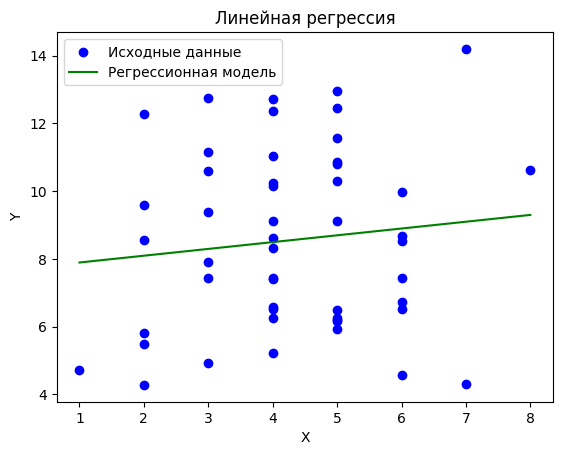

In [12]:
import matplotlib.pyplot as plt
import numpy as np

Y = np.array([5.49, 7.42, 4.28, 5.94, 10.25, 11.15, 8.52, 11.04, 4.31, 12.37, 10.81, 6.20, 10.15, 9.99, 7.45, 6.52, 4.93, 10.87, 8.55, 5.82, 10.64, 9.11, 11.56, 7.45, 6.27, 5.22, 12.71, 8.68, 6.53, 9.59, 8.62, 8.33, 6.49, 10.29, 9.39, 12.27, 6.18, 14.20, 6.73, 6.57, 12.96, 6.26, 7.90, 7.44, 10.59, 12.75, 9.11, 12.46, 4.56, 4.71])
X = np.array([2, 4, 2, 5, 4, 3, 6, 4, 7, 4, 5, 5, 4, 6, 4, 4, 3, 5, 2, 2, 8, 4, 5, 3, 4, 4, 4, 6, 6, 2, 4, 4, 5, 5, 3, 2, 5, 7, 6, 4, 5, 5, 3, 6, 3, 3, 5, 5, 6, 1])

X_mean = np.mean(X)
Y_mean = np.mean(Y)

beta_1 = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean) ** 2)
beta_0 = Y_mean - beta_1 * X_mean

print("β0 =", beta_0)
print("β1 =", beta_1)

plt.scatter(X, Y, color='blue', label='Исходные данные')
plt.plot([min(X), max(X)], [beta_0 + beta_1 * min(X), beta_0 + beta_1 * max(X)], color='green', label='Регрессионная модель')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Линейная регрессия")
plt.legend()
plt.show()

### 2.Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом h. Проверить гипотезу нормальности ошибок на уровне значимости по $\chi^{2}$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Несмещенная оценка дисперсии: 6.9084112399999995
Статистика хи-квадрат: 17.519999999999996
Критическое значение хи-квадрат: 16.622421871110873
Ошибки не подчиняются нормальному распределению.
Статистика Колмогорова: 0.5391335360486166
p-значение: 3.973873649727849e-14
Оценка не соответствует нормальному распределению.


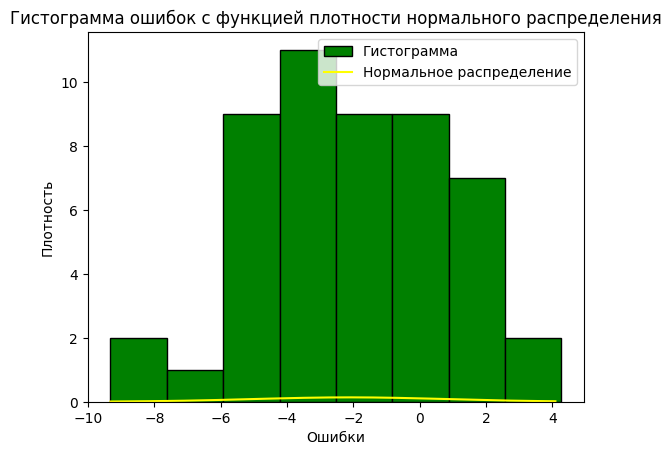

In [11]:
from scipy.stats import chi2, kstest, norm

s_2 = np.var(Y)
print("Несмещенная оценка дисперсии:", s_2)

predicted_Y = beta_0 + beta_1 * X
errors = Y - predicted_Y

alpha = 0.02

observed_frequencies, bin_edges = np.histogram(errors, bins=np.arange(min(errors), max(errors) + 1.7, 1.7))
expected_frequencies = len(Y) * np.diff(bin_edges) / np.sum(np.diff(bin_edges))
chi2_statistic = np.sum((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies)
chi2_critical_value = chi2.ppf(1 - alpha, df=len(observed_frequencies) - 1)
print("Статистика хи-квадрат:", chi2_statistic)
print("Критическое значение хи-квадрат:", chi2_critical_value)

if chi2_statistic > chi2_critical_value:
    print("Ошибки не подчиняются нормальному распределению.")
else:
    print("Ошибки могут иметь нормальное распределение.")

ks, crit_value = kstest(errors, 'norm')
print("Статистика Колмогорова:", ks)
print("p-значение:", crit_value)

if crit_value < alpha:
    print("Оценка не соответствует нормальному распределению.")
else:
    print("Оценка соответствует нормальному распределению.")

plt.hist(errors, bins=np.arange(min(errors), max(errors) + 1.7, 1.7), edgecolor='black', color='green', label='Гистограмма')
plt.xlabel("Ошибки")
plt.ylabel("Плотность")
plt.title("Гистограмма ошибок с функцией плотности нормального распределения")
x = np.linspace(min(errors), max(errors), 1000)
plt.plot(x, norm.pdf(x, np.mean(errors), np.std(errors)), color='yellow', label='Нормальное распределение')
plt.legend()
plt.show()


### 3.В предположении нормальности ошибок построить доверительный интервал для параметров $\beta_0,\beta_1$ уровня доверия $1-\alpha$. Построить доверительный эллипс уровня доверия $1-\alpha$ для ($\beta_0,\beta_1$) (вычислить его полуоси).

In [4]:
from scipy.stats import t

beta_0_hat = np.mean(Y)
beta_1_hat = np.sum((Y - beta_0_hat) * X) / np.sum(X ** 2)

s_2 = np.var(Y - beta_0_hat - beta_1_hat * X)

se_beta_0 = np.sqrt(s_2 * ((1 / len(Y)) + ((X.mean()**2) / ((len(Y) - 1) * np.sum((X - X.mean())**2)))))
se_beta_1 = np.sqrt(s_2 / np.sum((X - X.mean()) ** 2))

t_critical = t.ppf(1 - alpha / 2, len(Y) - 2)
CI_beta_0 = [beta_0_hat - t_critical * se_beta_0, beta_0_hat + t_critical * se_beta_0]

CI_beta_1 = [beta_1_hat - t_critical * se_beta_1, beta_1_hat + t_critical * se_beta_1]

print("Доверительный интервал для beta_0:", CI_beta_0)
print("Доверительный интервал для beta_1:", CI_beta_1)

beta_1 = np.repeat(beta_1, len(errors))
cov_matrix = np.cov(np.column_stack((errors, beta_1)))

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

a = np.sqrt(eigenvalues[0] * chi2.ppf(1 - alpha / 2, 2))
b = np.sqrt(eigenvalues[1] * chi2.ppf(1 - alpha / 2, 2))

print("Полуось a доверительного эллипса:", a)
print("Полуось b доверительного эллипса:", b)

Доверительный интервал для beta_0: [7.586338382829304, 9.518861617170696]
Доверительный интервал для beta_1: [-0.5805662351106925, 0.6236336815044546]
Полуось a доверительного эллипса: 5.116381707881324e-07j
Полуось b доверительного эллипса: (39.7438696446052+0j)


### 4.Сформулировать гипотезу независимой переменной Y от переменной X. Провести проверку зависимости.

In [5]:
from scipy.stats import f
SSE = np.sum((Y - (beta_0 + beta_1 * X)) ** 2)
SSR = np.sum((beta_0 + beta_1 * X - np.mean(Y)) ** 2)
n = len(Y)
p = 2
alpha = 0.02

MSE = SSE / (n - p)
MSR = SSR / p
F = MSR / MSE
F_critical = f.ppf(1 - alpha, p, n - p)

print("F-критерий",F)
print("Критическое значение F = ",F_critical)
if F > F_critical:
    print("Отвергаем нулевую гипотезу. Существует значимая зависимость между Y и X.")
else:
    print("Не отвергаем нулевую гипотезу. Нет значимой зависимости между Y и X.")

F-критерий 0.31210369182163744
Критическое значение F =  4.248907630769176
Не отвергаем нулевую гипотезу. Нет значимой зависимости между Y и X.


### 5.Сформулировать модель включающую доплнительный член с $X^2$.Построить МНК оценки параметров $\beta_0,\beta_1,\beta_2$ в данной модели. Изобразить графически полученную регрессионную модель.



β0 =  5.991433441710518
β1 =  1.092321273044615
β2 =  -0.10301990693671936


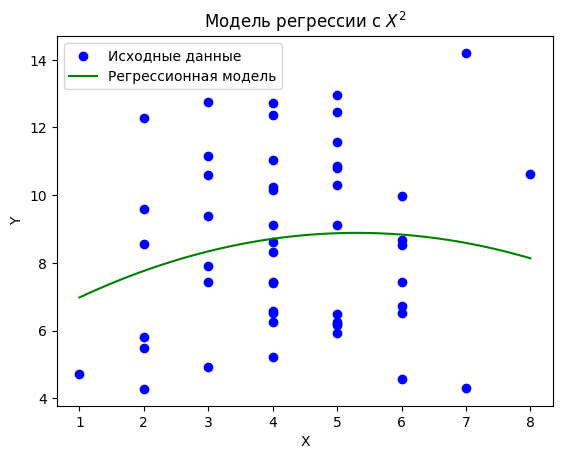

In [13]:
Y = np.array([5.49, 7.42, 4.28, 5.94, 10.25, 11.15, 8.52, 11.04, 4.31, 12.37, 10.81, 6.20, 10.15, 9.99, 7.45, 6.52, 4.93, 10.87, 8.55, 5.82, 10.64, 9.11, 11.56, 7.45, 6.27, 5.22, 12.71, 8.68, 6.53, 9.59, 8.62, 8.33, 6.49, 10.29, 9.39, 12.27, 6.18, 14.20, 6.73, 6.57, 12.96, 6.26, 7.90, 7.44, 10.59, 12.75, 9.11, 12.46, 4.56, 4.71])
X = np.array([2, 4, 2, 5, 4, 3, 6, 4, 7, 4, 5, 5, 4, 6, 4, 4, 3, 5, 2, 2, 8, 4, 5, 3, 4, 4, 4, 6, 6, 2, 4, 4, 5, 5, 3, 2, 5, 7, 6, 4, 5, 5, 3, 6, 3, 3, 5, 5, 6, 1])

X_2 = X ** 2
X_stacked = np.column_stack((np.ones_like(X), X, X_2))

# Используем метод наименьших квадратов для нахождения оценок параметров
beta = np.linalg.lstsq(X_stacked, Y, rcond=None)[0]

beta_0 = beta[0]
beta_1 = beta[1]
beta_2 = beta[2]

print("β0 = ",beta_0)
print("β1 = ",beta_1)
print("β2 = ",beta_2)

x = np.linspace(min(X), max(X), 100)
y = beta_0 + beta_1 * x + beta_2 * x ** 2

plt.scatter(X, Y, color='blue', label='Исходные данные')
plt.plot(x, y, color='green', label='Регрессионная модель')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Модель регрессии с $X^2$')
plt.legend()
plt.show()

### 6.Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

Несмещенная оценка дисперсии: 6.9084112399999995
Статистика хи-квадрат: 7.600000000000001
Критическое значение хи-квадрат: 13.38822259903634
Ошибки могут иметь нормальное распределение.
Статистика Колмогорова: 0.3340520549789474
p-значение: 1.7776868653765404e-05
Оценка не соответствует нормальному распределению.


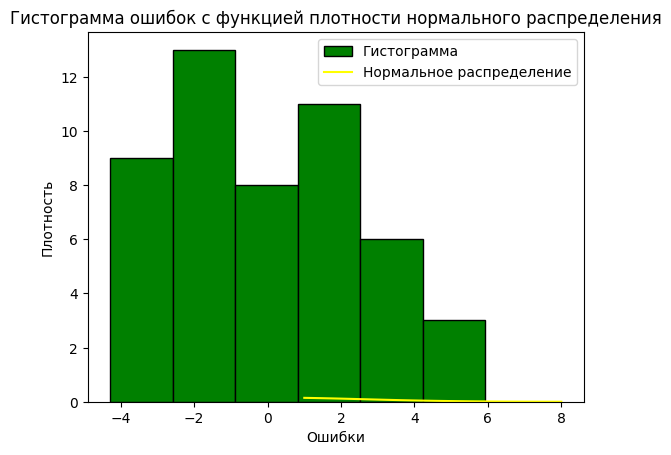

In [14]:
from scipy.stats import chi2, kstest, norm

s_2 = np.var(Y)
print("Несмещенная оценка дисперсии:", s_2)

predicted_Y = beta_0 + beta_1 * X + beta_2 * X ** 2
errors = Y - predicted_Y

alpha = 0.02

observed_frequencies, bin_edges = np.histogram(errors, bins=np.arange(min(errors), max(errors) + 1.7, 1.7))
expected_frequencies = len(Y) * np.diff(bin_edges) / np.sum(np.diff(bin_edges))
chi2_statistic = np.sum((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies)
chi2_critical_value = chi2.ppf(1 - alpha, df=len(observed_frequencies) - 1)
print("Статистика хи-квадрат:", chi2_statistic)
print("Критическое значение хи-квадрат:", chi2_critical_value)

if chi2_statistic > chi2_critical_value:
    print("Ошибки не подчиняются нормальному распределению.")
else:
    print("Ошибки могут иметь нормальное распределение.")

ks, crit_value = kstest(errors, 'norm')
print("Статистика Колмогорова:", ks)
print("p-значение:", crit_value)

if crit_value < alpha:
    print("Оценка не соответствует нормальному распределению.")
else:
    print("Оценка соответствует нормальному распределению.")

plt.hist(errors, bins=np.arange(min(errors), max(errors) + 1.7, 1.7), edgecolor='black', color='green', label='Гистограмма')
plt.plot(x, norm.pdf(x, np.mean(errors), np.std(errors)), color='yellow', label='Нормальное распределение')
plt.xlabel("Ошибки")
plt.ylabel("Плотность")
plt.title("Гистограмма ошибок с функцией плотности нормального распределения")
plt.legend()
plt.show()


### 7.В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0,\beta_1,\beta_2$ уровня доверия $1-\alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1-\alpha$.

In [8]:
alpha = 0.02
n = len(X)

mse = np.sum(errors**2) / (n - 3)
cov_matrix = mse * np.linalg.inv(X_stacked.T @ X_stacked)
std_errors = np.sqrt(np.diag(cov_matrix))

t_value = t.ppf(1 - alpha/2, n - 3)
ci_beta0 = [beta_0 - t_value * std_errors[0], beta_0 + t_value * std_errors[0]]
ci_beta1 = [beta_1 - t_value * std_errors[1], beta_1 + t_value * std_errors[1]]
ci_beta2 = [beta_2 - t_value * std_errors[2], beta_2 + t_value * std_errors[2]]

print("Доверительный интервал для beta_0:", ci_beta0)
print("Доверительный интервал для beta_1:", ci_beta1)
print("Доверительный интервал для beta_2:", ci_beta2)

a = np.sqrt(cov_matrix[0, 0])
b = np.sqrt(cov_matrix[1, 1])
c = np.sqrt(cov_matrix[2, 2])
eq_ellipse = f"{a:.4f}x^2 + {b:.4f}xy + {c:.4f}y^2 = {t_value**2:.4f}"

print("Уравнение доверительного эллипсоида:", eq_ellipse)


Доверительный интервал для beta_0: [0.09153952046852343, 11.891327362952513]
Доверительный интервал для beta_1: [-1.7012488940755266, 3.8858914401647566]
Доверительный интервал для beta_2: [-0.4178980697443796, 0.21185825587094087]
Уравнение доверительного эллипсоида: 2.4498x^2 + 1.1600xy + 0.1307y^2 = 5.8001


### 8.Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной X и проверить её значимость на уровне $\alpha$.


In [9]:
SSR = np.sum((beta_0 + beta_1 * X + beta_2 * X ** 2 - np.mean(Y)) ** 2)
SSE = np.sum((Y - (beta_0 + beta_1 * X + beta_2 * X ** 2)) ** 2)
p = 3
alpha = 0.02
n = len(Y)

MSE = SSE / (n - p)
MSR = SSR / p
F = MSR / MSE
F_critical = f.ppf(1 - alpha, p, n - p)

print("F = {:.4f}".format(F))
print("Критическое значение = {:.4f}".format(F_critical))

if F > F_critical:
    print("Гипотеза линейной регрессионной зависимости переменной Y от переменной X значима на уровне 0.01.")
else:
    print("Гипотеза линейной регрессионной зависимости переменной Y от переменной X не значима на уровне 0.01.")


F = 0.4134
Критическое значение = 3.6061
Гипотеза линейной регрессионной зависимости переменной Y от переменной X не значима на уровне 0.01.


## Выводы
В процессе выполнения практической работы был проведен регрессионный анализ. Работа были следующие этапы: построение модели, оценку параметров и проверку их значимости, проверку гипотезы о независимости и линейной регрессионной зависимости, а также оценку нормальности ошибок и построение доверительных интервалов и эллипсов,было оценено расстояние между полученной оценкой и классом нормальных распределений с помощью критерия Колмогорова.

Вследствии работы были сформулированы гипотезы о независимости переменной Y от переменной X и проведена проверка зависимости на данной выборке. Вся реализация была выполнена с использованием функциональности Python, включая специализированные библиотеки и функции из scipy.stats, которые облегчили наш анализ данных.